The brain’s architecture was inspiration on how to build an intelligent machine. This is what sparked artificial neural networks (ANNs)

- **ANN**: A Machine Learning model inspired by the networks of biological neurons found in our brains.

ANNs are at the very core of Deep Learning. 

They are used for Googles image recognization, apple's siri, recomendation systems, or learning games. 

# From Biological to Artificial Neurons

- **Connectionism** :the study of neural network

- ANNs frequently outperform other ML techniques on very large and complex problems.

- Increases in computing power have made training possible. 
- Anns rarely get stuck at a local optima

# Biological Neurons

- **Cell body**: containing the nucleus and most of the cell’s complex components
- **Dendrites**: branching extensions
- **Axon**: One very long extension called of the cell body
- **Telodendria**:  The axon splits off into many branches near its extremity. 
More bio stuff, don't have to remember? 

Individual biological neurons seem to behave in a rather simple way, but they are organized in a vast network of billions.

# Logical Computations with Neurons

- **Artificial neuron**: it has one or more binary (on/off) inputs and one binary output. 
- essentially a simple if statement

Artificial neurons activates its output when more than a certain number of its inputs are active

Figure 10-3 Artifical neurons operations 
![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1003.png)

- The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.

- The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).

- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).

- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

# The Perceptron

- **Perceptron**: a slightly different artificial neuron where the input and output are numbers. And  each input connection is associated with a weight. 

- **Linear threshold unit**: computes a weighted sum of its inputs  $
\left(z=w_{1} x_{1}+w_{2} x_{2}+\cdots+w_{n} x_{n}=\mathbf{x}^{\top} \mathbf{w}\right)
$ then applies a step function to that sum and outputs the result $
h_{\mathbf{w}}(\mathbf{x})=\operatorname{step}(z), \text { where } z=\mathbf{x}^{\top} \mathbf{w}
$ 

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1004.png)

The most common step function used in Perceptrons is the Heaviside step function
Sometimes the sign function is used instead.

Equation 10-1. Common step functions used in Perceptrons (assuming threshold = 0)
$$
\text { heaviside }(z)=\left\{\begin{array}{ll}
0 & \text { if } z<0 \\
1 & \text { if } z \geq 0
\end{array} \quad \operatorname{sgn}(z)=\left\{\begin{array}{ll}
-1 & \text { if } z<0 \\
0 & \text { if } z=0 \\
+1 & \text { if } z>0
\end{array}\right.\right.
$$

- A single TLU can be used for simple linear binary classification

EX: Ue a single TLU to classify iris flowers based on petal length and width 

- Training a TLU in this case means finding the right values for $w_0$, $w_1$, and $w_2$

- A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. 

-  **fully connected layer**, or a **dense layer**: When all the neurons in a layer are connected to every neuron in the previous layer.

- **input neurons**: they output whatever input they are fed.

- **Input layer**: All of the input neurons

- **bias neuron**: Represents a bias feature. outputs 1 all the time

 A Perceptron with two inputs and three outputs is represented in Figure 10-5 below. This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multilabel classifier.
 
 ![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1005.png)
 
 
 We can compute the output of a layer of neurons all at once. 
 
Eqn 10-2:  Computing the outputs of a fully connected layer 
 $$
h_{\mathbf{W}, \mathbf{b}}(\mathbf{X})=\phi(\mathbf{X} \mathbf{W}+\mathbf{b})
$$

- X represents the matrix of input features. It has one row per instance and one column per feature.

- The weight matrix W contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificial neuron in the layer.

- The bias vector b contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.

- The function ϕ is called the activation function: when the artificial neurons are TLUs, it is a step function.

-  **Hebb’s rule** (or Hebbian learning):the connection weight between two neurons tends to increase when they fire simultaneously. 

This Perceptron learning rule reinforces connections that help reduce the error.

More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. The rule is shown in Equation 10-3 below.

$$
w_{i, j}^{(\text {next step })}=w_{i, j}+\eta\left(y_{j}-\hat{y}_{j}\right) x_{i}
$$

- $w_{i, j}$ is the connection weight between the ith input neuron and the jth output neuron.

- $x_i$ is the ith input value of the current training instance.

- $\hat{y}_j$ is the output of the jth output neuron for the current training instance.

- $y_j$ is the target output of the jth output neuron for the current training instance.

- η is the learning rate.


The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns 

- **Perceptron convergence theorem.**  If the training instances are linearly separable,this algorithm would converge to a solution.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

- Perceptron learning algorithm strongly resembles Stochastic Gradient Descent.

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

- Perceptrons do not output a class probability. This is one reason to prefer Logistic Regression over Perceptrons.

limitations of Perceptrons can be eliminated by stacking multiple Perceptrons.

- **Multilayer Perceptron**: Multiple Stacked Perceptrons 

# The Multilayer Perceptron and Backpropagation

- An MLP is composed of one input layer, one or more layers of TLUs(hidden layers)  and one final layer of TLUs called the output layer. 

- **lower layers**: layers close to the input layer

Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

- **deep neural network (DNN)**: When an ANN contains a deep stack of hidden layers


The trainging algorithms for MLP is 

- **backpropagation training algorithm**: In short, it is Gradient Descent using an efficient technique for computing the gradients automatically. Determines how to tweak the weights to reduce error. 

- **NOTE**:  Automatically computing gradients is called automatic differentiation, or autodiff. There are various autodiff techniques, with different pros and cons. The one used by backpropagation is called reverse-mode autodiff. It is fast and precise, and is well suited when the function to differentiate has many variables (e.g., connection weights) and few outputs (e.g., one loss). If you want to learn more about autodiff, check out Appendix D in the book.

Let’s run through this algorithm in a bit more detail:

- It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.

- Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

- Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

Summarzing this : for each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

- **WARNING** : It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

- In order for this algorithm to work properly the step function is the logistic (sigmoid) function $\sigma(z)=1 /(1+\exp (-z))$. This adds a hill(a gradient can then be used )


### Other Popular Step Functions 

The hyperbolic tangent function: tanh(z) = 2σ(2z) – 1

    Just like the logistic function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.
    
The Rectified Linear Unit function: ReLU(z) = max(0, z)

     The ReLU function is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for z < 0. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default.13 Most importantly, the fact that it does not have a maximum output value helps reduce some issues during Gradient Descent).
     
- **activation functions**: A step function 

If we don't use activation functions then each layer will be considered a single layer. This is because they all solve a problem with the same complexity. 

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1008.png)

# Regression MLPs

- MLPs can be used for regression tasks

-  If you want to predict a single value you just need a single output neuron.

- For multivariate regression, you need one output neuron per output dimension

- For MLP for regression, you do not want to use any activation function for the output neurons

-  To guarantee that the output will always be positive, then you can use the ReLU activation function in the output layer.  

- **Softplus activation function**: A smooth variant of ReLU, softplus(z) = log(1 + exp(z))

- If you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, then scale the labels to the appropriate range. 

Typical Loss function 

- mean squared error

- if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead

Huber loss, which is a combination of both.

**TIP**: The Huber loss is quadratic when the error is smaller than a threshold δ (typically 1) but linear when the error is larger than δ. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error.


### Typical  architecture of a regression MLP

| Hyperparameter	|Typical value |
|-------------------|--------------|
| # input neurons   | One per input feature (e.g., 28 x 28 = 784 for MNIST) | 
| # hidden layers   | Depends on the problem, but typically 1 to 5  |
|# neurons per hidden layer| Depends on the problem, but typically 10 to 100|
|# output neurons    | 1 per prediction dimension |
| Hidden activation  | ReLU (or SELU, see Chapter 11) | 
| Output activation  | None, or ReLU/softplus (if positive outputs) or logistic/tanh (if bounded outputs) |
| Loss function    | MSE or MAE/Huber (if outliers) | 

# Classification MLPs

- For a binary classification problem, you just need a single output neuron using the logistic activation function

- the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class

- The estimated probability of the negative class is equal to one minus that number.

Multilabel binary classification 

- Dedicate one output neuron for each positive class

- If each instance can belong only to a single class (eg a single digit from 0 thru 9) you need to have one output neuron per class,.

- Use a softmax activation function for the whole output layer. 

- **softmax function**: ensures that all the estimated probabilities are between 0 and 1 and that they add up to 1 

Loss Function 

- Cross-entropy loss (also called the log loss) is generally a good choice. 


Typical architecture of a classification MLP.

|Hyperparameter	         | Binary classification	|Multilabel binary classification | Multiclass classification |
|------------------------|--------------------------|---------------------------------|---------------------------|
|Input and hidden layers | Same as regression       |Same as regression               | Same as regression        |
| # output neurons       | 1                        |1 per label                      |       1 per class         |
|Output layer activation |Logistic                  | Logistic                        | Softmax                   |
| Loss function          |Cross entropy             |Cross entropy                    |Cross entropy              |


You have all the concepts you need to start implementing MLPs with Keras



# Implementing MLPs with Keras


**Multibackend Keras**

-  To perform the heavy computations required by neural networks it  relies on a computation backend. 

- you can choose from three popular open source Deep Learning libraries: TensorFlow, Microsoft Cognitive Toolkit (CNTK), and Theano. other implementations have been released JavaScript or TypeScript (to run Keras code in a web browser), and PlaidML (which can run on all sorts of GPU devices, not just Nvidia) and many more. 

- TensorFlow itself now comes bundled with its own Keras implementation, tf.keras. This allows us to use Tensorflow Apis' such as TF Data API.  

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1010.png)

- The most popular Deep Learning library, after Keras and TensorFlow, is Facebook’s PyTorch library.

- Once you know Keras, it is not difficult to switch to PyTorch. They were inspired by sklearn and chainer.



In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.5.0'

In [3]:
keras.__version__
#the version of the Keras API implemented by tf.keras

'2.5.0'

# Building an Image Classifier Using the Sequential API

-  We will use Fashion MNIST

- 70,000 grayscale images of 28 × 28 pixels each, with 10 classes

- the images represent fashion items rather than handwritten digits

- Thus the problem turns out to be significantly more challenging than MNIST.

- A simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

## USING KERAS TO LOAD THE DATASET

In [4]:
# Keras provides some utility functions to fetch and load common datasets
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
# t every image is represented as a 28 × 28 array rather than a 1D array of size 784
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

There is no validation set, so we’ll create one now. since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 .



In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [8]:
# For Fashion MNIST we need the list of class names to know what we are dealing with:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# the first image in the training set represents a coat:
class_names[y_train[0]]

'Coat'

In [9]:
y_train[0]

4

Samples from the Fashion MSNT Dataset 

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1011.png)

# CREATING THE MODEL USING THE SEQUENTIAL API

Here is a classification MLP with two hidden layers:

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let’s go through this code line by line:

- The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.

- Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 28*28). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting input_shape=[28,28].

- Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes Equation 10-2.

- Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.

- Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).


- **TIP**: Specifying activation="relu" is equivalent to specifying activation=keras.activations.relu. Other activation functions are available in the keras.activations package, we will use many of them in this book. See https://keras.io/activations/ for the full list.

In [11]:
# Instead of adding the layers one by one as we just did, 
# you can pass a list of layers when creating the Sequential model:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# USING CODE EXAMPLES FROM KERAS.IO

Code examples documented on keras.io will work fine with tf.keras, but you need to change the imports. For example, consider this keras.io code:



In [12]:
from keras.layers import Dense
# output_layer = Dense(10)

In [13]:
#You must change the imports like this:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

This approach is more verbose, but I use it in this book so you can easily see which packages to use, and to avoid confusion between standard classes and custom classes.

- The model’s summary() method displays all the model’s layers 

The summary includes:

- Each layer’s name
- its output shape
- number of parameters

- The summary ends with the total number of parameters, including trainable and non-trainable parameters.

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- **Dense layers** often have a lot of parameters. 

- For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters

- This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting especially when you do not have a lot of training data.



In [15]:
# You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name:
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [17]:
model.get_layer('dense_3') is hidden1

True

In [18]:
# Access parameters with get_weights() and set_weights()
weights, biases = hidden1.get_weights()
weights

array([[-2.1464750e-03, -3.2529876e-02, -1.5262183e-02, ...,
        -1.3105795e-03,  8.5406899e-03, -3.6444444e-02],
       [-6.3532025e-02,  6.0944483e-02,  6.5623716e-02, ...,
         5.2042976e-02, -8.5994154e-03,  7.0309341e-03],
       [ 6.4758435e-02,  3.1512059e-02,  3.3124819e-02, ...,
         1.2559891e-02, -2.0416554e-02,  5.4857239e-02],
       ...,
       [ 5.5092201e-03,  5.4104820e-02, -8.4963441e-03, ...,
        -1.4903169e-02,  5.2396208e-02,  1.7420314e-02],
       [ 2.2592530e-02,  6.8063006e-02, -9.8086894e-05, ...,
        -3.6417391e-02, -2.2300880e-02,  3.0775055e-02],
       [-6.5863028e-02,  1.1268631e-02,  2.7589194e-02, ...,
         3.5672411e-03, -4.0185284e-02,  2.6057616e-02]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

- Dense layer initialized the connection weights randomly( is needed to break symmetry) and  biases were initialized to zeros, which is fine.

- For a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer.

-  initialization method will be further dicussed in chapter 11


- NOTE:  The shape of the weight matrix depends on the number of inputs. This is why it is recommended to specify the input_shape when creating the first layer in a Sequential model. However, if you do not specify the input shape, it’s OK: Keras will simply wait until it knows the input shape before it actually builds the model. This will happen either when you feed it actual data (e.g., during training), or when you call its build() method. Until the model is really built, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model). So, if you know the input shape when creating the model, it is best to specify it.


# COMPILING THE MODEL

After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:



In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

- Note: Using loss="sparse_categorical_crossentropy" is equivalent to using loss=keras.losses.sparse_categorical_crossentropy. Similarly, specifying optimizer="sgd" is equivalent to specifying optimizer=keras.optimizers.SGD(), and metrics=["accuracy"] is equivalent to metrics=[keras.metrics.sparse_categorical_accuracy] (when using this loss). We will use many other losses, optimizers, and metrics in this book; for the full lists,


- We use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive.


- If instead we had one target probability per class for each instance (such as one-hot vectors to represent class 3), then we would need to use the "categorical_crossentropy" loss instead.


- were doing binary classification or multilabel binary classification, then we would use the "sigmoid"  activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.


- **TIP**: If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the keras.utils.to_categorical() function. To go the other way round, use the np.argmax() function with axis=1.

Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus Gradient Descent). We will discuss more efficient optimizers in Chapter 11 (they improve the Gradient Descent part, not the autodiff).



- NOTE: When using the SGD optimizer, it is important to tune the learning rate. So, you will generally want to use optimizer=keras.optimizers.SGD(lr=???) to set the learning rate, rather than optimizer="sgd", which defaults to lr=0.01.

 # TRAINING AND EVALUATING THE MODEL
 
Now the model is ready to be trained. For this we simply need to call its fit() method:

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7094 - accuracy: 0.7661 - val_loss: 0.5023 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4868 - accuracy: 0.8303 - val_loss: 0.4544 - val_accuracy: 0.8452
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4423 - accuracy: 0.8457 - val_loss: 0.4451 - val_accuracy: 0.8446
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4155 - accuracy: 0.8532 - val_loss: 0.4308 - val_accuracy: 0.8472
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3964 - accuracy: 0.8610 - val_loss: 0.3974 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3790 - accuracy: 0.8675 - val_loss: 0.3650 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3656 - accuracy: 0.8709 - val_loss: 0.3703 - val_accuracy:

- We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1). 

-  We also pass a validation set (this is optional)

-  Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is useful to see how the model really performs 

- If the performance on the training set is better than on the validation set. The model is probably overfitting the training set. 

- **TIP**: Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.

- If the training set was very skewed(specific class with higher representaion),it would be useful to set the class_weight argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes.

- If you need per-instance weights, set the sample_weight argument (if both class_weight and sample_weight are provided, Keras multiplies them). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple.

- The fit() method returns a **History** object containing the training parameters(history.params), the list of epochs it went through(history.epoch), and most importantly a dictionary(history.history). 



In [24]:
history.history

{'loss': [0.7094171643257141,
  0.48683422803878784,
  0.44231462478637695,
  0.4154796600341797,
  0.3963824212551117,
  0.3789786994457245,
  0.365550696849823,
  0.3548777401447296,
  0.3434709310531616,
  0.3339502811431885,
  0.3261406719684601,
  0.3179630935192108,
  0.310824990272522,
  0.3031958341598511,
  0.29700279235839844,
  0.29147017002105713,
  0.28419044613838196,
  0.2786494791507721,
  0.27419376373291016,
  0.2682740092277527,
  0.26361826062202454,
  0.25903797149658203,
  0.25324445962905884,
  0.2498549520969391,
  0.24502216279506683,
  0.24144811928272247,
  0.23752665519714355,
  0.23446249961853027,
  0.22917698323726654,
  0.2254130095243454],
 'accuracy': [0.7660727500915527,
  0.8303454518318176,
  0.845727264881134,
  0.8531818389892578,
  0.8610363602638245,
  0.8674545288085938,
  0.8709454536437988,
  0.8737999796867371,
  0.878600001335144,
  0.8815272450447083,
  0.8839272856712341,
  0.885418176651001,
  0.8877636194229126,
  0.8907999992370605,
  

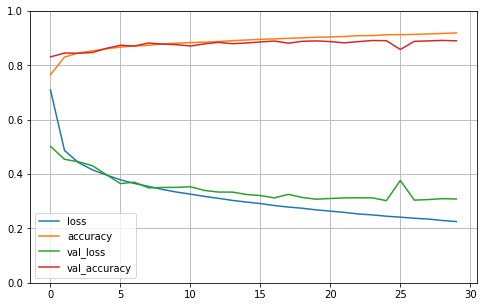

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

- The training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! 

- the validation curves are close to the training curves, which means that there is not too much overfitting.

- The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. Which is why validation accuracy starts off higher. 

- **TIP**: When plotting the training curve, it should be shifted by half an epoch to the left.


- You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training.It’s as simple as calling the fit() method again, since Keras just continues training where it left off 

### Hyperparmeter Tuning 

- If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters

- first check is the learning rate.

- try another optimizer(always retune the learning rate after changing any hyperparameter)

If still unstatisfied

- Try tuning model hyperparameters such as the number of layers

- number of neurons per layer

-  the types of activation functions to use for each hidden layer

- the batch size (it can be set in the fit() method using the batch_size argument)

Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production

- You can easily do this using the evaluate() method 

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8785


[0.3379684388637543, 0.8784999847412109]

- it is common to get slightly lower performance on the test set than on the validation set,not the test set. 

-  resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

# USING THE MODEL TO MAKE PREDICTIONS

- use the model’s predict() method to make predictions on new instances



In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

- each instance the model estimates one probability per class, from class 0 to class 9.

-  If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the predict_classes() method instead:

In [28]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\JungleBook\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [29]:
#Another way of doing it, they have been changing how the api works. 
np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API

Let’s switch to the California housing problem and tackle it using a regression neural network.



In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target) #Load data
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full) #Cool way of splitting the full training/test into validatoin sets 

scaler = StandardScaler() #Going to use a sgd method, requires normalization 
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

- The main differences(b/w classification and regression) are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error.

- Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting

In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), #One layer using the relu, that standard 
    keras.layers.Dense(1) #A single output
])
model.compile(loss="mean_squared_error", optimizer="sgd") #Specify hyperparameters useed for training 
history = model.fit(X_train, y_train, epochs=20,  #Train
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)  
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1046 - val_loss: 1.0134
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7778 - val_loss: 0.7846
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7242 - val_loss: 0.4767
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4306 - val_loss: 0.4491
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4150 - val_loss: 0.4345
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4043 - val_loss: 0.4307
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3970 - val_loss: 0.4218
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3985 - val_loss: 0.4266
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3931 - val_loss: 0.4128
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3853 - val_loss: 0.4099

Sequential API is quite easy to use, it is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the Functional API.

# Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide & Deep neural network. 

- It connects all or part of the inputs directly to the output layer

- This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)

In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1014.png)



In [34]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) 
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

First, we need to create an Input object. This is a specification of the kind of input the model will get, including its shape and dtype. A model may actually have multiple inputs, as we will see shortly.

Next, we create a Dense layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.

We then create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer.

Next, we create a Concatenate layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer. You may prefer the keras.layers.concatenate() function, which creates a Concatenate layer and immediately calls it with the given inputs.

Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.

Lastly, we create a Keras Model, specifying which inputs and outputs to use.

- Once you have built the Keras model, everything is exactly like earlier, so there’s no need to repeat it here: you must compile the model, train it, evaluate it, and use it to make predictions.

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path

-  In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):



In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1015.png)

- You should name at least the most important layers, especially when the model gets a bit complex like this. 

Note that we specified inputs=[input_A, input_B] when creating the model. Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B): one per input. The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict():



In [36]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) 
#set hyperparameters for regression

#We can select the features we wish to pass thru the wide later, 
# and the deep later
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


#Fit it with the required dimensions 
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
# Eval
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
#Predict
y_pred = model.predict((X_new_A, X_new_B))

C:\Users\JungleBook\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6671 - val_loss: 0.8663
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7176 - val_loss: 0.7232
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6438 - val_loss: 0.6805
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6147 - val_loss: 0.6444
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5842 - val_loss: 0.6316
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5757 - val_loss: 0.6133
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5586 - val_loss: 0.6191
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5617 - val_loss: 0.6123
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5525 - val_loss: 0.6096
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5566 - val_loss: 0.5613

There are many use cases in which you may want to have multiple outputs:

- The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

- Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.

- Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-16) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

![](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1016.png)

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs.

In [37]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

- Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses
(if we pass a single loss, Keras will assume that the same loss must be used for all outputs)

We care much more about the main output than about the auxiliary output (as it is just used for regularization)  so we want to give the main output’s loss a much greater weight.

In [38]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Now when we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing y_train, we need to pass (y_train, y_train) (and the same goes for y_valid and y_test):

In [39]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.0184 - main_output_loss: 0.9683 - aux_output_loss: 1.4686 - val_loss: 0.6125 - val_main_output_loss: 0.5557 - val_aux_output_loss: 1.1243
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5525 - main_output_loss: 0.4967 - aux_output_loss: 1.0553 - val_loss: 0.5882 - val_main_output_loss: 0.5461 - val_aux_output_loss: 0.9670
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5481 - main_output_loss: 0.5084 - aux_output_loss: 0.9051 - val_loss: 0.5279 - val_main_output_loss: 0.4928 - val_aux_output_loss: 0.8434
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4872 - main_output_loss: 0.4520 - aux_output_loss: 0.8044 - val_loss: 0.4998 - val_main_output_loss: 0.4682 - val_aux_output_loss: 0.7843
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4641 - main_output_loss: 0.4336 - aux_output_loss: 0.7391 - val_loss

In [40]:
# When we evaluate the model, Keras will return the total loss, as well as all the individual losses:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3494 - main_output_loss: 0.3370 - aux_output_loss: 0.4606


In [41]:
# Similarly, the predict() method will return predictions for each output:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# Using the Subclassing API to Build Dynamic Models

Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages:

- he model can easily be saved. cloned and shared. 

- Its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early

- It’s also fairly easy to debug, since the whole model is a static graph of layers

But the flip side is just that: it's static  

-  Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors.

- For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

Simply subclass the Model class, create the layers you need in the constructor, and use them to perform the computations you want in the call() method. For example, creating an instance of the following WideAndDeepModel class gives us an equivalent model to the one we just built with the Functional API. You can then compile it, evaluate it, and use it to make predictions, exactly like we just did:



In [42]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [43]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.5310 - output_1_loss: 2.2683 - output_2_loss: 4.8952 - val_loss: 1.3834 - val_output_1_loss: 1.0892 - val_output_2_loss: 4.0311
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1728 - output_1_loss: 0.9357 - output_2_loss: 3.3062 - val_loss: 0.9831 - val_output_1_loss: 0.7888 - val_output_2_loss: 2.7316
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8717 - output_1_loss: 0.7118 - output_2_loss: 2.3102 - val_loss: 0.8633 - val_output_1_loss: 0.7344 - val_output_2_loss: 2.0235
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7859 - output_1_loss: 0.6721 - output_2_loss: 1.8098 - val_loss: 0.7987 - val_output_1_loss: 0.7012 - val_output_2_loss: 1.6756
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7366 - output_1_loss: 0.6446 - output_2_loss: 1.5641 - val_loss: 0.7577 - val_output_1_loss: 0.6753 - val_ou

This example looks very much like the Functional API, except we do not need to create the inputs we just use the input argument to the call() methods and we separate the creation of the layers in the constructor from their usage in the call() method.


- The big difference is that you can do pretty much anything you want in the call() method: for loops, if statements, low-level TensorFlow operations

- This extra flexibility does come at a cost: your model’s architecture is hidden within the call() method, so Keras cannot easily inspect it

- it cannot save or clone it

- when you call the summary() method, you only get a list of layers, without any information on how they are connected to each other

- Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes.

So unless you really need that extra flexibility, you should probably stick to the Sequential API or the Functional API.

- **Tip**: Keras models can be used just like regular layers, so you can easily combine them to build complex architectures.

# Saving and Restoring a Model

When using the Sequential API or the Functional API, saving a trained Keras model is as simple as it gets:



In [44]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.9206 - val_loss: 0.8762
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7019 - val_loss: 0.6965
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6136 - val_loss: 0.6548
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5785 - val_loss: 0.6191
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5504 - val_loss: 0.5968
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5315 - val_loss: 0.5749
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5139 - val_loss: 0.5619
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5023 - val_loss: 0.5472
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4909 - val_loss: 0.5355
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4586


In [45]:
model.save("my_keras_model.h5")

Keras will use the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer 

It also saves the optimizer 

You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:



In [46]:
model = keras.models.load_model("my_keras_model.h5")

- **WARNING**: This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. You can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore everything else yourself.


But what if training lasts several hours?


In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes.

How can you tell the fit() method to save checkpoints? Use callbacks.

# Using Callbacks

The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:



In [47]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
# build and compile the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.9206 - val_loss: 0.8762
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7019 - val_loss: 0.6965
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6136 - val_loss: 0.6548
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5785 - val_loss: 0.6191
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5504 - val_loss: 0.5968
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5315 - val_loss: 0.5749
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5139 - val_loss: 0.5619
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5023 - val_loss: 0.5472
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4909 - val_loss: 0.5355
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4586


In [49]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.4747 - val_loss: 0.5204
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4687 - val_loss: 0.5151
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4634 - val_loss: 0.5111
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4593 - val_loss: 0.5060
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4553 - val_loss: 0.5032
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4526 - val_loss: 0.4980
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4488 - val_loss: 0.4988
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4480 - val_loss: 0.4916
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4432 - val_loss: 0.4884
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4408 - val_lo

Moreover, if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. 

This way, you do not need to worry about training for too long and overfitting the training set:

In [50]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3664 - val_loss: 0.4098
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3676 - val_loss: 0.4017
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3680 - val_loss: 0.4145
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3705 - val_loss: 0.4025
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3702 - val_loss: 0.4185
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3701 - val_loss: 0.4045
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3735 - val_loss: 0.4209
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3746 - val_loss: 0.4028
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3688 - val_loss: 0.4170
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3670 - val_loss: 0.4005

Another way to implement early stopping is to simply use the EarlyStopping callback.

t will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. 



The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the EarlyStopping callback will keep track of the best weights and restore them for you at the end of training.

If you need extra control, you can easily write your own custom callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

In [51]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

As you might expect, you can implement on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end(). Callbacks can also be used during evaluation and predictions, should you ever need them (e.g., for debugging). For evaluation, you should implement on_test_begin(), on_test_end(), on_test_batch_begin(), or on_test_batch_end() (called by evaluate()), and for prediction you should implement on_predict_begin(), on_predict_end(), on_predict_batch_begin(), or on_predict_batch_end() (called by predict()).

Now let’s take a look at one more tool you should definitely have in your toolbox when using tf.keras: TensorBoard.

# Using TensorBoard for Visualization

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more! This tool is installed automatically when you install TensorFlow, so you already have it.

To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called event files.

Each binary data record is called a summary.
 
The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data

In general, you want to point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.

Let’s start by defining the root log directory we will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time so that it’s different at every run. You may want to include extra information in the log directory name, such as hyperparameter values that you are testing, to make it easier to know what you are looking at in TensorBoard:

In [52]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
# The good news is that Keras provides a nice TensorBoard() callback:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.9206 - val_loss: 0.8762
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7019 - val_loss: 0.6965
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6136 - val_loss: 0.6548
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5785 - val_loss: 0.6191
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5504 - val_loss: 0.5968
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5315 - val_loss: 0.5749
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5139 - val_loss: 0.5619
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5023 - val_loss: 0.5472
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4909 - val_loss: 0.5355
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4821 - val_loss: 0.5277

And that’s all there is to it! It could hardly be easier to use. If you run this code, the TensorBoard() callback will take care of creating the log directory for you. 

There’s one directory per run, each containing one subdirectory for training logs and one for validation logs. Both contain event files, but the training logs also include profiling traces: this allows TensorBoard to show you exactly how much time the model spent on each part of your model, across all your devices, which is great for locating performance bottlenecks.

Next you need to start the TensorBoard server. One way to do this is by running a command in a terminal.We can also do it via Jupyter notebook.

In [55]:
%load_ext tensorboard
%tensorboard --logdir ./my_logs

In [57]:
#Now we make some more sweet data 
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2021_07_19-17_24_41'

In [58]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5766 - val_loss: 1.2938
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4695 - val_loss: 0.4236
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4033 - val_loss: 0.5830
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5368 - val_loss: 0.4407
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4049 - val_loss: 0.3977
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3581 - val_loss: 0.3695
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3457 - val_loss: 0.3732
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3480 - val_loss: 0.3619
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3524 - val_loss: 0.3911
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3322 - val_loss: 0.3611

- You can also visualize the whole graph, the learned weights (projected to 3D), or the profiling traces. The TensorBoard() callback has options to log extra data too, such as embeddings 

TensorFlow offers a lower-level API in the tf.summary package

The following code creates a SummaryWriter using the create_file_writer() function, and it uses this writer as a context to log scalars, histograms, images, audio, and text, all of which can then be visualized using TensorBoard


In [59]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
# This is actually a useful visualization tool to have, even beyond TensorFlow or Deep Learning.

# Fine-Tuning Neural Network Hyperparameters

- The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak

 How do you know what combination of hyperparameters is the best for your task?
 
- One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross-validation).
 
- we can use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space

To do this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [61]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate) # compiles it using an SGD optimizer 
    #configured with the specified learning rate.
    model.compile(loss="mse", optimizer=optimizer)
    return model
# This function creates a simple Sequential model for univariate regression (only one output neuron),

In [62]:
# Next, let’s create a KerasRegressor based on this build_model() function:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The KerasRegressor object is a thin wrapper around the Keras model built using build_model(). Since we did not specify any hyperparameters when creating it, it will use the default hyperparameters we defined in build_model()

Now we can use this object like a regular Scikit-Learn regressor: we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method, as you can see in the following code:

In [63]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2039 - val_loss: 1.0548
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8834 - val_loss: 0.6566
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5769 - val_loss: 0.6048
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5399 - val_loss: 0.5707
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5145 - val_loss: 0.5464
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4966 - val_loss: 0.5310
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4833 - val_loss: 0.5178
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4733 - val_loss: 0.5067
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4645 - val_loss: 0.4986
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4581 - val_lo

- Note that any extra parameter you pass to the fit() method will get passed to the underlying Keras model. Also note that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses 

- We don’t want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])


- Note that RandomizedSearchCV uses K-fold cross-validation, so it does not use X_valid and y_valid, which are only used for early stopping.

The exploration may last many hours, depending on the hardware, the size of the dataset, the complexity of the model, and the values of n_iter and cv. When it’s over, you can access the best parameters found, the best score, and the trained Keras model like this:

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

- Using randomized search is not too hard, and it works well for many fairly simple problems. When training is slow, however (e.g., for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space.

You can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. 

There are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. 

- Such techniques take care of the “zooming” process for you and lead to much better solutions in much less time. Here are some Python libraries you can use to optimize hyperparameters:

Hyperopt

    A popular library for optimizing over all sorts of complex search spaces (including real values, such as the learning rate, and discrete values, such as the number of layers).

Hyperas, kopt, or Talos

    Useful libraries for optimizing hyperparameters for Keras models (the first two are based on Hyperopt).

Keras Tuner

    An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted service for visualization and analysis.

Scikit-Optimize (skopt)

    A general-purpose optimization library. The BayesSearchCV class performs Bayesian optimization using an interface similar to GridSearchCV.

Spearmint

    A Bayesian optimization library.

Hyperband

    A fast hyperparameter tuning library based on the recent Hyperband paper by Lisha Li et al.

Sklearn-Deap

    A hyperparameter optimization library based on evolutionary algorithms, with a GridSearchCV-like interface.
    
Moreover, many companies offer services for hyperparameter optimization. We’ll discuss Google Cloud AI Platform’s hyperparameter tuning service in chapter 19.

- Hyperparameter tuning is still an active area of research, and evolutionary algorithms are making a comeback.

Google has also used an evolutionary approach, not just to search for hyperparameters but also to look for the best neural network architecture for the problem; their AutoML suite is available. Perhaps the days of building neural networks manually will soon be over?

In fact, evolutionary algorithms have been used successfully to train individual neural networks, replacing the ubiquitous Gradient Descent!

But despite all this exciting progress and all these tools and services, it still helps to have an idea of what values are reasonable for each hyperparameter so that you can build a quick prototype and restrict the search space. The following sections provide guidelines for choosing the number of hidden layers and neurons in an MLP and for selecting good values for some of the main hyperparameters.

## Number of Hidden Layers

For many problems, you can begin with a single hidden layer and get reasonable results. An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. 

But for complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

Real-world data is often structured in such a hierarchical way, and deep neural networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces).

- Not only does this hierarchical architecture help DNNs converge faster to a good solution, but it also improves their ability to generalize to new datasets.

For example, if you have already trained a model to recognize faces in pictures and you now want to train a new neural network to recognize hairstyles, you can kickstart the training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the values of the weights and biases of the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called **transfer learning**.


In summary, for many problems you can start with just one or two hidden layers and the neural network will work just fine. For instance, you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total number of neurons, in roughly the same amount of training time.

Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, but not fully connected ones, as we will see in Chapter 14), and they need a huge amount of training data. 

## Number of Neurons per Hidden Layer

The number of neurons in the input and output layers is determined by the type of input and output your task requires. For example, the MNIST task requires 28 × 28 = 784 input neurons and 10 output neurons.

As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features. A typical neural network for MNIST might have 3 hidden layers, the first with 300 neurons, the second with 200, and the third with 100. 

However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better; plus, there is only one hyperparameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

Just like the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. But in practice, it’s often simpler and more efficient to pick a model with more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting.

- **TIP**: In general you will get more bang for your buck by increasing the number of layers instead of the number of neurons per layer.

## Learning Rate, Batch Size, and Other Hyperparameters

The numbers of hidden layers and neurons are not the only hyperparameters you can tweak in an MLP. Here are some of the most important ones, as well as tips on how to set them:

Learning rate

    The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges, as we saw in Chapter 4). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., 10-5) and gradually increasing it up to a very large value (e.g., 10). This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by exp(log(106)/500) to go from 10-5 to 10 in 500 iterations). If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). You can then reinitialize your model and train it normally using this good learning rate. We will look at more learning rate techniques in Chapter 11.

Optimizer

    Choosing a better optimizer than plain old Mini-batch Gradient Descent (and tuning its hyperparameters) is also quite important. We will see several advanced optimizers in Chapter 11.

Batch size

    The batch size can have a significant impact on your model’s performance and training time. The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently (see Chapter 19), so the training algorithm will see more instances per second. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM. There’s a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. In April 2018, Yann LeCun even tweeted “Friends don’t let friends use mini-batches larger than 32,” citing a 2018 paper by Dominic Masters and Carlo Luschi which concluded that using small batches (from 2 to 32) was preferable because small batches led to better models in less training time. Other papers point in the opposite direction, however; in 2017, papers by Elad Hoffer et al.26 and Priya Goyal et al.27 showed that it was possible to use very large batch sizes (up to 8,192) using various techniques such as warming up the learning rate (i.e., starting training with a small learning rate, then ramping it up, as we will see in Chapter 11). This led to a very short training time, without any generalization gap. So, one strategy is to try to use a large batch size, using learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch size instead.

Activation function

    We discussed how to choose the activation function earlier in this chapter: in general, the ReLU activation function will be a good default for all hidden layers. For the output layer, it really depends on your task.

Number of iterations

    In most cases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.
    
- **TIP**: The optimal learning rate depends on the other hyperparameters—especially the batch size—so if you modify any hyperparameter, make sure to update the learning rate as well.

For more best practices regarding tuning neural network hyperparameters, check out the excellent 2018 [paper](https://arxiv.org/abs/1803.09820) by Leslie Smith.

